In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simplePreprocessor import SimplePreprocessor
from deepNN import DNN

In [3]:
df = pd.read_csv('dataset_NN.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
preprocessor = SimplePreprocessor()

In [5]:
X.head()

,att1,att2,att3,att4,att5,att6
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


In [6]:
att_list = ['att4', 'att5', 'att6']
X = preprocessor.Standardize(X, att_list)

In [7]:
X.head()

,att1,att2,att3,att4,att5,att6
0,1.0,0.0,0.0,-0.930348,-1.125501,-1.206871
1,1.0,0.0,0.0,-1.187285,-1.156216,-1.209768
2,1.0,0.0,0.0,-1.009397,-1.100311,-1.220508
3,1.0,0.0,0.0,-1.077170,-1.265605,-1.186956
4,1.0,0.0,0.0,-1.165774,-1.063905,-1.199553


In [8]:
X = X.to_numpy()
y = y.to_numpy()

In [9]:
y = preprocessor.OneHot(y)

In [10]:
y.shape, X.shape

((10, 2000), (2000, 6))

In [11]:
X_train, X_test, y_train, y_test =preprocessor.train_test_split(X.T, y)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6, 1400), (6, 600), (10, 1400), (10, 600))

In [17]:
layer_dims = [X_train.shape[0], 100, 50, y_train.shape[0]]
model1 = DNN(layer_dims, lRate=0.0015, n_iters=300,activation='ReLu', GD_type='MiniBatchGD', batch_size=128, optimizer='Momentum', momentum=0.9)

('Layer 1 W shape : (100, 6)', 'b shape : (100, 1)')
('Layer 2 W shape : (50, 100)', 'b shape : (50, 1)')
('Layer 3 W shape : (10, 50)', 'b shape : (10, 1)')


In [18]:
costs = model1.fit(X_train, y_train, print_cost=True)

Cost after iteration0: 0.6072793942309685
Cost after iteration10: 0.6072268165787859
Cost after iteration20: 0.6071726539619205
Cost after iteration30: 0.6071184774845577
Cost after iteration40: 0.6070642871486013
Cost after iteration50: 0.6070100829416523
Cost after iteration60: 0.6069558648515953
Cost after iteration70: 0.6069016328946436
Cost after iteration80: 0.606847387123224
Cost after iteration90: 0.6067931274232337
Cost after iteration100: 0.6067388537945568
Cost after iteration110: 0.6066845661473148
Cost after iteration120: 0.6066302644739819
Cost after iteration130: 0.6065759488406562
Cost after iteration140: 0.6065216190317717
Cost after iteration150: 0.6064672750572587
Cost after iteration160: 0.6064129170931896
Cost after iteration170: 0.6063585451356873
Cost after iteration180: 0.6063041591710902
Cost after iteration190: 0.6062497591698188
Cost after iteration200: 0.606195345146437
Cost after iteration210: 0.606140917091348
Cost after iteration220: 0.6060864750003558
Co

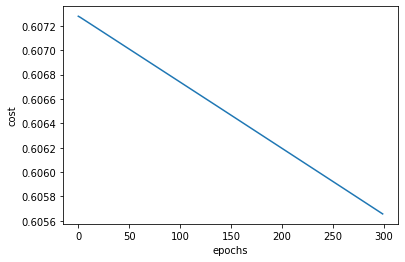

In [19]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()